# Wine Quality Classifier

In [11]:
!pip install torchmetrics

  Using cached torchmetrics-1.7.0-py3-none-any.whl.metadata (21 kB)
  Using cached lightning_utilities-0.14.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.wh

In [1]:
import pandas as pd
import seaborn as sns
import torch

## Raw data

In [2]:
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', delimiter=";")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [3]:
df_raw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df_raw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

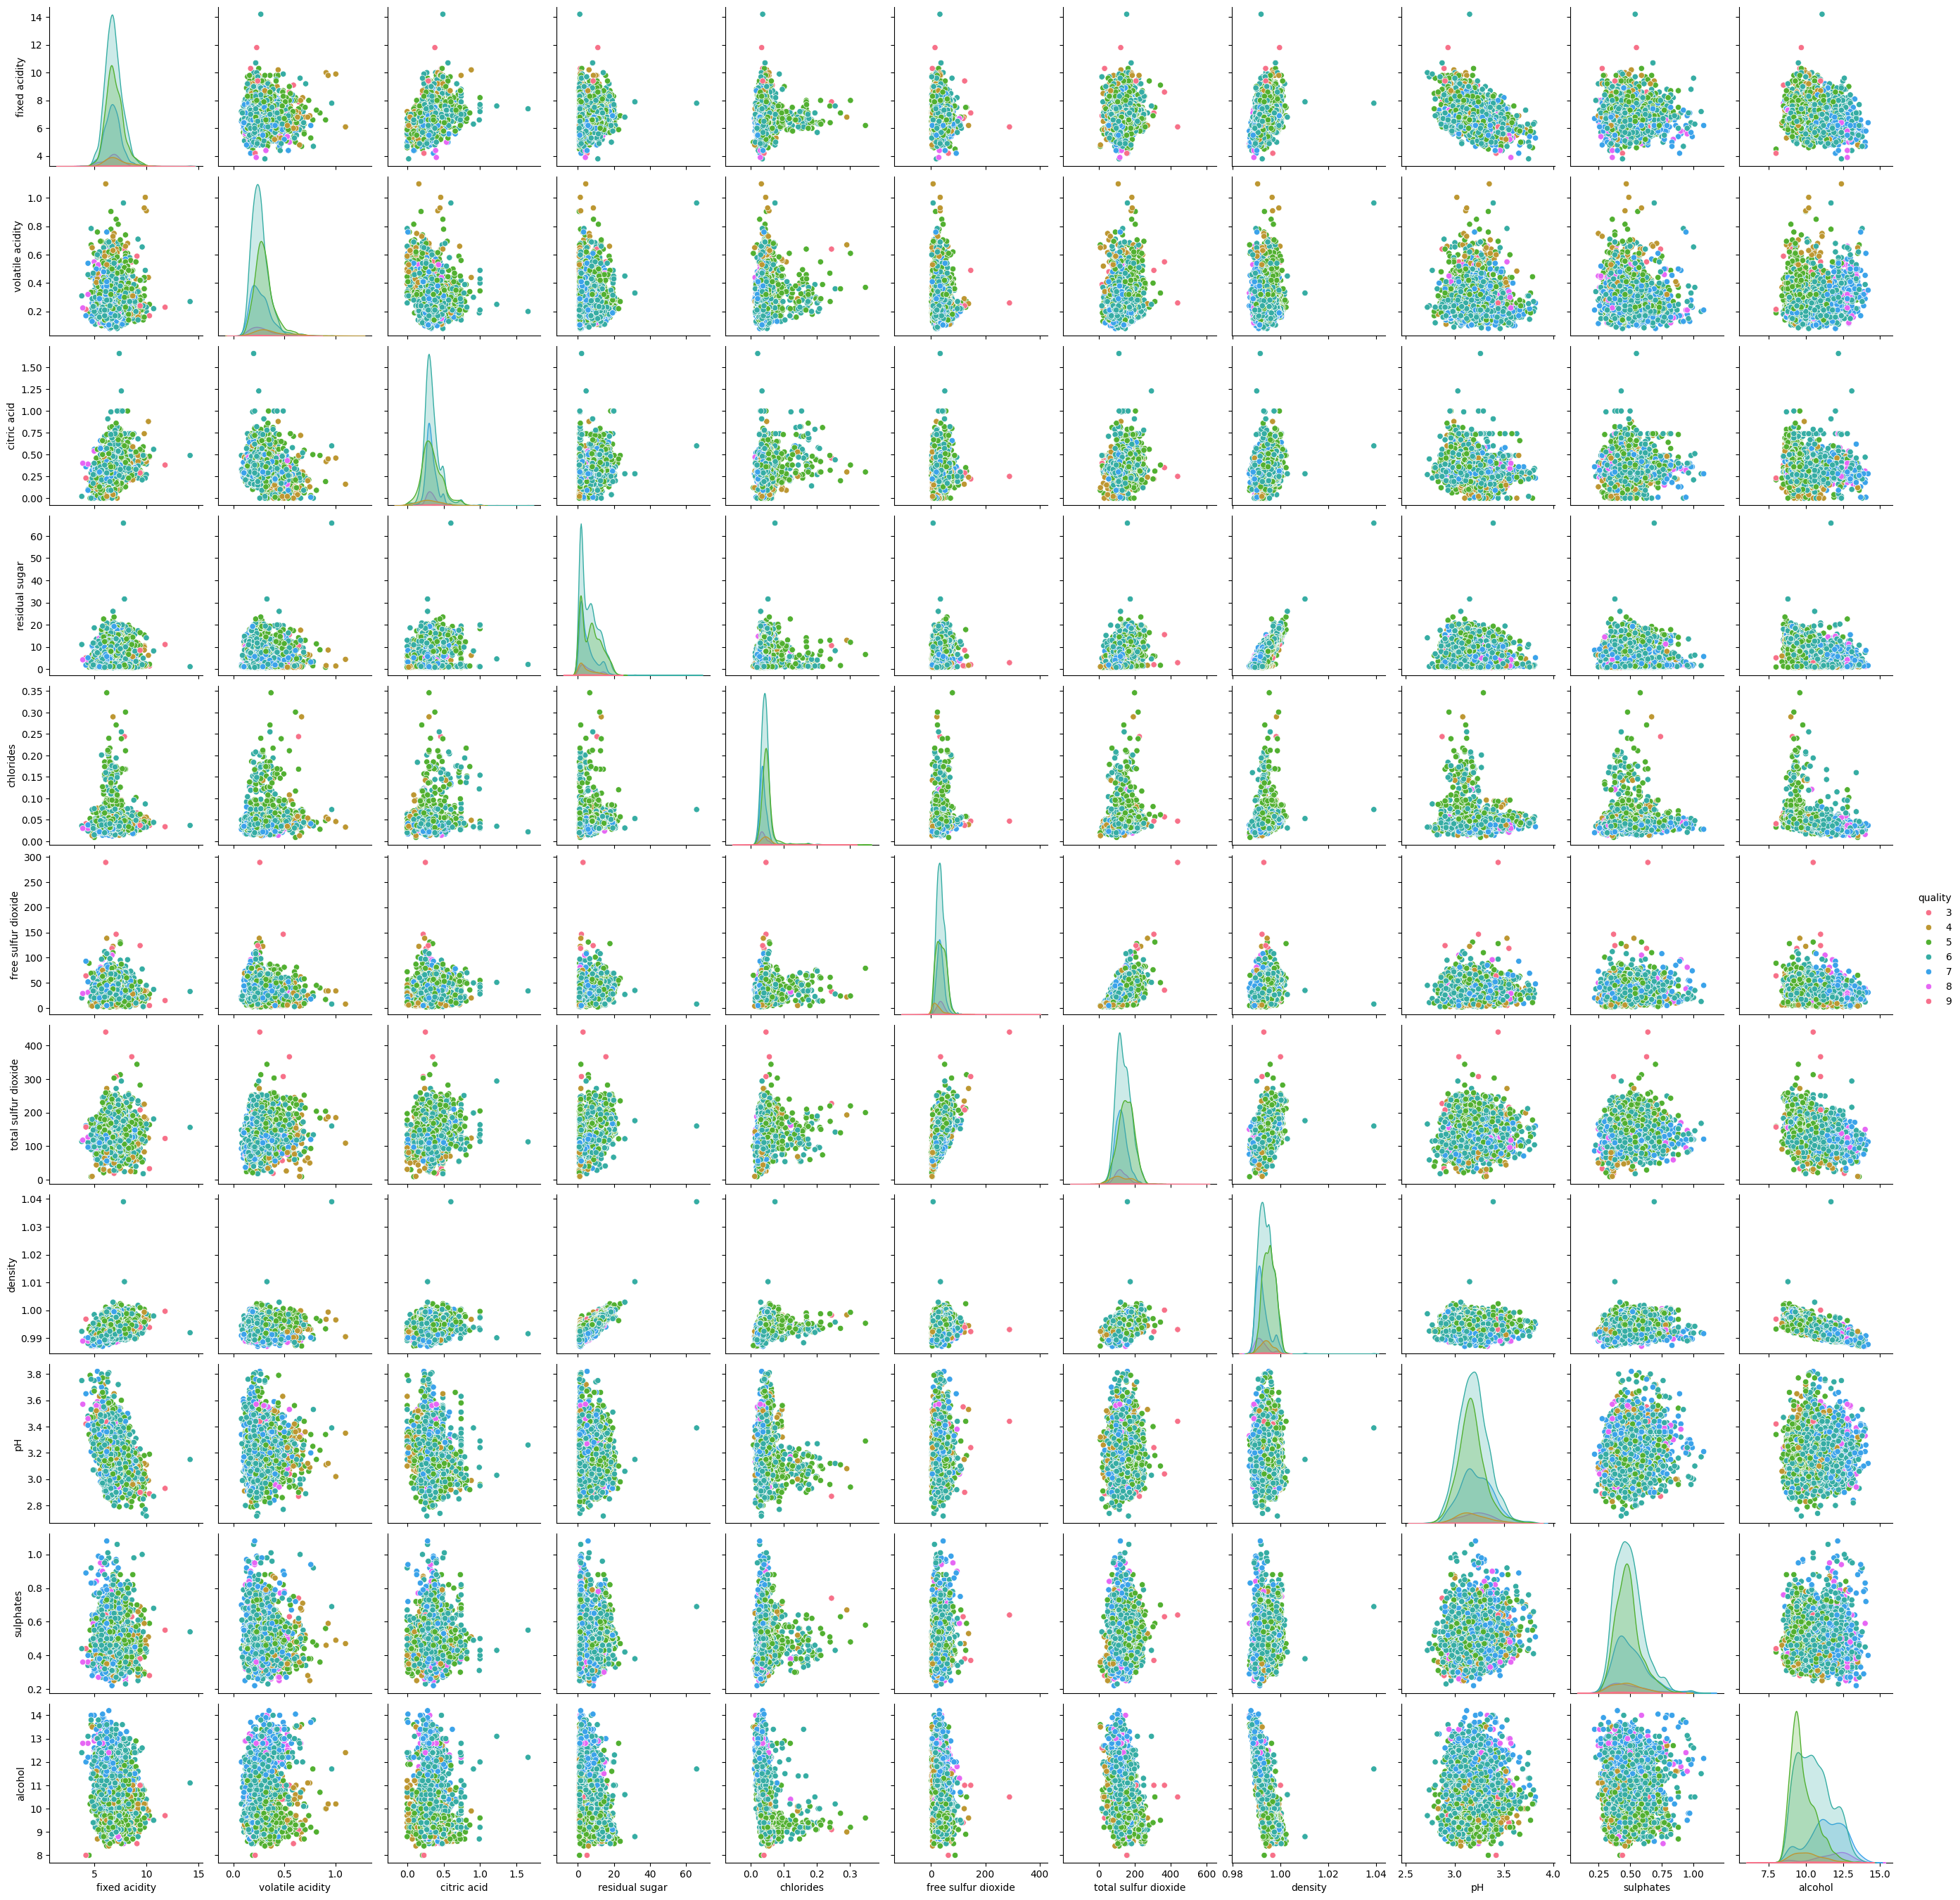

In [ ]:
sns.pairplot(df_raw, hue="quality", palette="husl")

## Data preprocessing

In [3]:
X = df_raw.drop(columns=['quality'])
X.columns = X.columns.str.strip().str.replace(' ', '_')

y = df_raw['quality']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f'{X_train.shape=}')
print(f'{X_val.shape=}')
print(f'{X_test.shape=}')

X_train.shape=(3918, 11)
X_val.shape=(490, 11)
X_test.shape=(490, 11)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [ ]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
4665,0.515119,-1.076233,0.227731,0.340419,-0.813688,0.534065,-0.641932,-0.447041,-0.328261,-0.702445,1.540371
1943,-0.669188,-0.288777,0.895832,1.002071,-0.217212,0.773947,1.355106,0.903370,-0.061886,0.266074,-0.821712
3399,-1.498203,0.400248,-0.022807,0.184737,-0.400743,-0.605377,-1.022320,-0.460280,0.404271,0.001933,0.481506
843,0.041396,-0.879369,0.144218,-0.924503,-0.446626,-0.125612,-0.879675,-0.304718,0.137896,0.442168,0.237153
2580,0.988842,0.203384,-0.607396,2.432407,0.333383,0.054300,0.855846,1.883079,0.071302,0.089980,-0.088652


In [6]:
def create_dataloader(X, y, batch_size=32, shuffle=False):
    """
    Create DataLoader from X and y DataFrame.
    """
    X_tensor = torch.FloatTensor(X.values)
    y_tensor = torch.FloatTensor(y.values)
    dataset = TensorDataset(X_tensor, y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    return dataloader

In [27]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 128

train_dataloader = create_dataloader(X_train, y_train, batch_size=batch_size, shuffle=True)
val_dataloader = create_dataloader(X_val, y_val, batch_size=batch_size, shuffle=False)
test_dataloader = create_dataloader(X_test, y_test, batch_size=batch_size, shuffle=False)

## Neural network

In [8]:
import torch.nn as nn

class WineClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs, num_layers, dropout_rate):
        super().__init__()
        layers=[]

        # input layer
        layers.append(nn.Linear(num_inputs, num_hidden))
        layers.append(nn.ReLU())
        layers.append(nn.Dropout(p=dropout_rate))

        # hidden layers
        for _ in range(num_layers-1):
            layers.append(nn.Linear(num_hidden, num_hidden))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(p=dropout_rate))

        # output layer
        layers.append(nn.Linear(num_hidden, num_outputs))

        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        return self.layers(x)

In [12]:
from tqdm import tqdm
import torchmetrics

def evaluate(model, dataloader, device, num_classes, verbose=2):
    model.eval()
    metric_acc = torchmetrics.classification.Accuracy(task='multiclass', num_classes=num_classes).to(device)

    for X, y in tqdm(dataloader, disable=(verbose<2)):
        X, y = X.to(device), y.to(device)

        with torch.inference_mode():
            logits = model(X)
            _, preds = torch.max(logits, dim=1)

            metric_acc(preds, y)

    return metric_acc.compute()

In [13]:
from tqdm import tqdm
import torchmetrics

def train(model, train_dataloader, val_dataloader, loss_module, optimizer, device, num_classes, num_epochs, verbose=2):
    metric_acc = torchmetrics.classification.Accuracy(task='multiclass', num_classes=num_classes).to(device)

    for epoch in range(num_epochs):
        model.train()

        for X, y in tqdm(train_dataloader, disable=(verbose<2)):
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()

            logits = model(X)

            loss = loss_module(logits, y.long())
            loss.backward()
            optimizer.step()

            _, preds = torch.max(logits, dim=1)
            metric_acc(preds, y)

        train_accuracy = metric_acc.compute()
        metric_acc.reset()

        val_accuracy = evaluate(model, val_dataloader, device, num_classes=num_classes, verbose=verbose)

        if verbose >= 1:
            print(f'Epoch {epoch}: {train_accuracy=:.3f}, {val_accuracy=:.3f}')


In [14]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(f"Device: {device}")

Device: cuda:0


In [22]:
classifier = WineClassifier(num_inputs=11, num_hidden=64, num_outputs=11, num_layers=4, dropout_rate=0.1).to(device)
optimizer = torch.optim.Adam(classifier.parameters(), lr = 1e-3)
loss_module = nn.CrossEntropyLoss()

In [28]:
train(classifier, train_dataloader, val_dataloader, loss_module, optimizer, device, num_classes=11, num_epochs=100, verbose=1)

Epoch 0: train_accuracy=0.662, val_accuracy=0.588
Epoch 1: train_accuracy=0.675, val_accuracy=0.604
Epoch 2: train_accuracy=0.660, val_accuracy=0.616
Epoch 3: train_accuracy=0.668, val_accuracy=0.606
Epoch 4: train_accuracy=0.667, val_accuracy=0.602
Epoch 5: train_accuracy=0.676, val_accuracy=0.614
Epoch 6: train_accuracy=0.663, val_accuracy=0.606
Epoch 7: train_accuracy=0.668, val_accuracy=0.604
Epoch 8: train_accuracy=0.671, val_accuracy=0.592
Epoch 9: train_accuracy=0.675, val_accuracy=0.612
Epoch 10: train_accuracy=0.671, val_accuracy=0.594
Epoch 11: train_accuracy=0.679, val_accuracy=0.618
Epoch 12: train_accuracy=0.679, val_accuracy=0.610
Epoch 13: train_accuracy=0.673, val_accuracy=0.580
Epoch 14: train_accuracy=0.684, val_accuracy=0.612
Epoch 15: train_accuracy=0.676, val_accuracy=0.606
Epoch 16: train_accuracy=0.685, val_accuracy=0.594
Epoch 17: train_accuracy=0.680, val_accuracy=0.608
Epoch 18: train_accuracy=0.678, val_accuracy=0.598
Epoch 19: train_accuracy=0.673, val_accur